<a href="https://colab.research.google.com/github/Amaresh-bot/Denoising-ASL-Perfusion-MRI-using-PyTorch/blob/main/Final_NITW_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Please upload your .nii or .nii.gz file:


Saving rsrsub-60_task-restEyesOpen_asl.nii to rsrsub-60_task-restEyesOpen_asl.nii

 Image loaded successfully: rsrsub-60_task-restEyesOpen_asl.nii
 Image Shape: (224, 256, 176)
 Data Type: float64
 Affine Matrix:
[[  -0.8984375     0.            0.          105.4442749 ]
 [   0.            0.8984375     0.          -96.83295441]
 [   0.            0.            0.89999998 -130.12869263]
 [   0.            0.            0.            1.        ]]


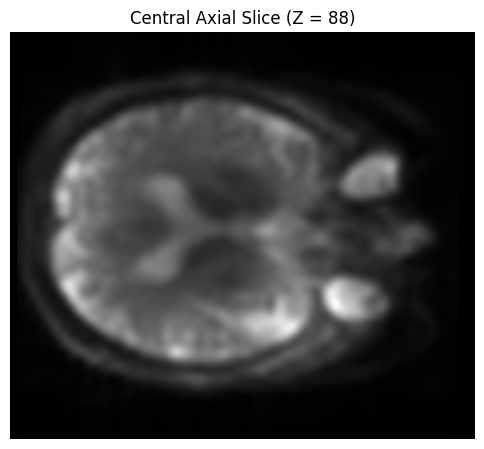

In [ ]:
#  Install dependencies (if not already installed)
!pip install -q nibabel matplotlib

#  Upload NIfTI file
from google.colab import files
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

print(" Please upload your .nii or .nii.gz file:")
uploaded = files.upload()

#  Load the uploaded file
nii_file = list(uploaded.keys())[0]  # Get uploaded file name
img = nib.load(nii_file)
data = img.get_fdata()

#  Print image properties
print(f"\n Image loaded successfully: {nii_file}")
print(f" Image Shape: {data.shape}")
print(f" Data Type: {data.dtype}")
print(f" Affine Matrix:\n{img.affine}")

#  Show only the central axial slice
def show_axial_slice(data):
    z = data.shape[2] // 2  # Central axial index
    plt.figure(figsize=(6, 6))
    plt.imshow(data[:, :, z], cmap="gray", origin="lower")
    plt.title(f"Central Axial Slice (Z = {z})")
    plt.axis('off')
    plt.show()

show_axial_slice(data)



 Original Image loaded: rsrsub-60_task-restEyesOpen_asl.nii
 Original Shape: (224, 256, 176)
 Data Type: float64

 Preprocessed Tensor Details:
 Tensor Shape (B, C, H, W): torch.Size([1, 1, 128, 128])
 Tensor Dtype: torch.float32
 Min-Max Values: 0.0012 - 0.9909


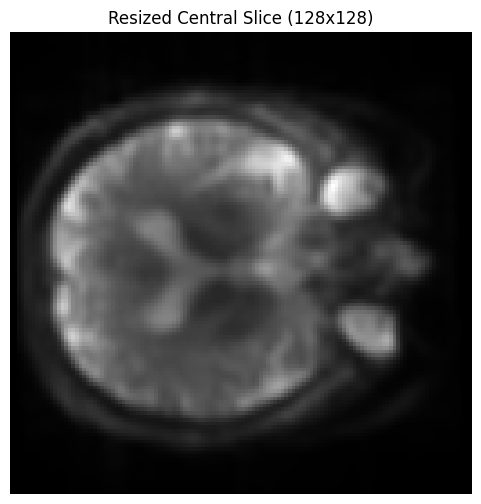


 Saved as NIfTI: resized_128x128_slice.nii


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import torch
from google.colab import files

#  Load uploaded NIfTI file
nii_file = "rsrsub-60_task-restEyesOpen_asl.nii"
img = nib.load(nii_file)
data = img.get_fdata()

print(f"\n Original Image loaded: {nii_file}")
print(f" Original Shape: {data.shape}")
print(f" Data Type: {data.dtype}")

#  Extract central axial slice
center_slice = data[:, :, data.shape[2] // 2]  # shape: (224, 256)

#  Normalize to [0, 1]
norm_slice = (center_slice - np.min(center_slice)) / (np.max(center_slice) - np.min(center_slice))

#  Resize to 128x128
resized_slice = resize(norm_slice, (128, 128), mode='reflect', anti_aliasing=True)

#  Convert to torch tensor (B, C, H, W) = (1, 1, 128, 128)
tensor_slice = torch.tensor(resized_slice, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

#  Print final tensor details
print(f"\n Preprocessed Tensor Details:")
print(f" Tensor Shape (B, C, H, W): {tensor_slice.shape}")
print(f" Tensor Dtype: {tensor_slice.dtype}")
print(f" Min-Max Values: {tensor_slice.min().item():.4f} - {tensor_slice.max().item():.4f}")

#  Visualize
plt.figure(figsize=(6, 6))
plt.imshow(resized_slice, cmap='gray')
plt.title("Resized Central Slice (128x128)")
plt.axis('off')
plt.show()

#  Save resized slice as new .nii (shape: 128,128,1)
nii_output = resized_slice[:, :, np.newaxis]  # (128, 128, 1)
new_img = nib.Nifti1Image(nii_output, affine=img.affine)
output_filename = "resized_128x128_slice.nii"
nib.save(new_img, output_filename)
print(f"\n Saved as NIfTI: {output_filename}")

#  Download file
files.download(output_filename)


Saving rsrsub-60_task-restEyesOpen_asl.nii to rsrsub-60_task-restEyesOpen_asl (1).nii


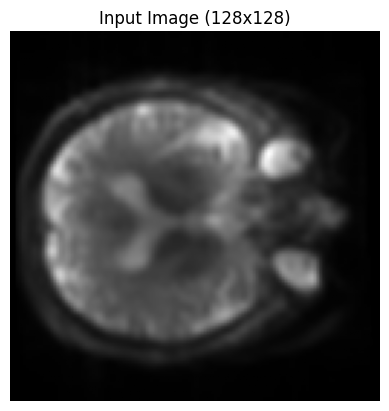


 Training U-Net
Epoch 010 - Loss: 0.007532
Epoch 020 - Loss: 0.002452
Epoch 030 - Loss: 0.000982
Epoch 040 - Loss: 0.000504
Epoch 050 - Loss: 0.000275
Epoch 060 - Loss: 0.000162
Epoch 070 - Loss: 0.000104
Epoch 080 - Loss: 0.000069
Epoch 090 - Loss: 0.000049
Epoch 100 - Loss: 0.000036

 Training DilatedNet
Epoch 010 - Loss: 0.017335
Epoch 020 - Loss: 0.004568
Epoch 030 - Loss: 0.001931
Epoch 040 - Loss: 0.001023
Epoch 050 - Loss: 0.000603
Epoch 060 - Loss: 0.000406
Epoch 070 - Loss: 0.000294
Epoch 080 - Loss: 0.000226
Epoch 090 - Loss: 0.000182
Epoch 100 - Loss: 0.000150

 Training DWAN
Epoch 010 - Loss: 0.040777
Epoch 020 - Loss: 0.016889
Epoch 030 - Loss: 0.010333
Epoch 040 - Loss: 0.004022
Epoch 050 - Loss: 0.001283
Epoch 060 - Loss: 0.000749
Epoch 070 - Loss: 0.000747
Epoch 080 - Loss: 0.000617
Epoch 090 - Loss: 0.000561
Epoch 100 - Loss: 0.000526


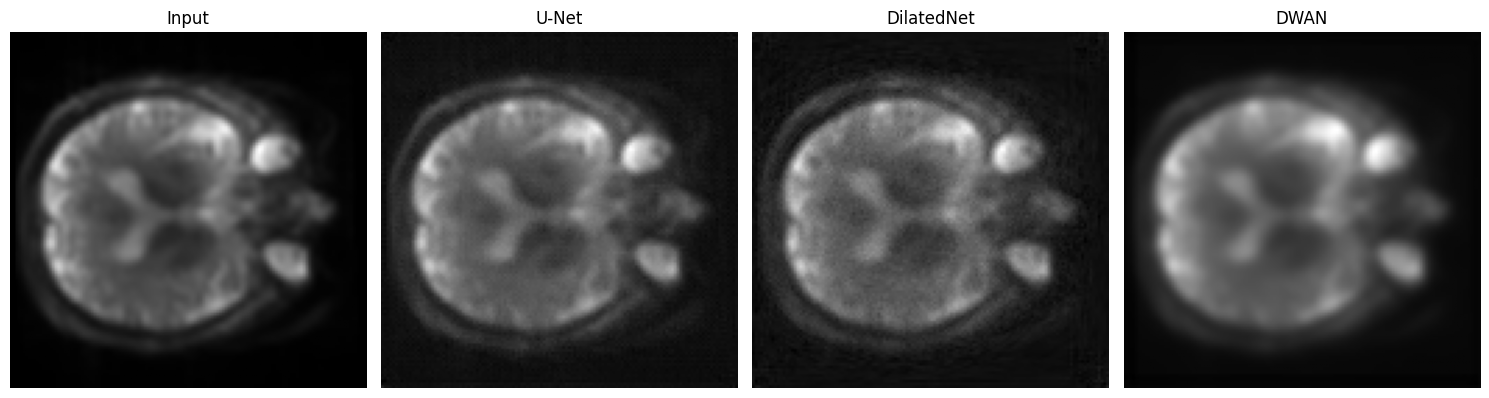


 U-Net Output Shape: torch.Size([1, 1, 128, 128])
   PSNR: 38.6845
   SSIM: 0.9416
   CCC: 0.9981
   MAE: 0.0091

 DilatedNet Output Shape: torch.Size([1, 1, 128, 128])
   PSNR: 34.8660
   SSIM: 0.8945
   CCC: 0.9953
   MAE: 0.0136

 DWAN Output Shape: torch.Size([1, 1, 128, 128])
   PSNR: 32.8245
   SSIM: 0.9260
   CCC: 0.9926
   MAE: 0.0148


In [ ]:
#  Imports
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from scipy import stats
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from google.colab import files

#  Upload NIfTI file
uploaded = files.upload()
nii_path = next(iter(uploaded))
nii = nib.load(nii_path)
data = nii.get_fdata()

#  Extract and preprocess 2D slice
center_slice = data[:, :, data.shape[2] // 2]
norm = (center_slice - np.min(center_slice)) / (np.max(center_slice) - np.min(center_slice))
resized = torch.tensor(norm, dtype=torch.float32)
resized = torch.nn.functional.interpolate(resized.unsqueeze(0).unsqueeze(0), size=(128, 128), mode='bilinear', align_corners=False)
input_tensor = resized

#  Visualize input
plt.imshow(input_tensor.squeeze().numpy(), cmap='gray')
plt.title("Input Image (128x128)")
plt.axis('off')
plt.show()

# --------------------
# Model Definitions
# --------------------
def double_conv(in_ch, out_ch):
    return nn.Sequential(
        nn.Conv2d(in_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU(),
        nn.Conv2d(out_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU()
    )

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc1 = double_conv(1, 64)
        self.enc2 = double_conv(64, 128)
        self.enc3 = double_conv(128, 256)
        self.enc4 = double_conv(256, 512)
        self.pool = nn.MaxPool2d(2)
        self.up4 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec4 = double_conv(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec3 = double_conv(256, 128)
        self.up2 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec2 = double_conv(128, 64)
        self.final = nn.Conv2d(64, 1, 1)

    def forward(self, x):
        e1 = self.enc1(x); p1 = self.pool(e1)
        e2 = self.enc2(p1); p2 = self.pool(e2)
        e3 = self.enc3(p2); p3 = self.pool(e3)
        e4 = self.enc4(p3)
        d4 = self.up4(e4); d4 = torch.cat([d4, e3], 1); d4 = self.dec4(d4)
        d3 = self.up3(d4); d3 = torch.cat([d3, e2], 1); d3 = self.dec3(d3)
        d2 = self.up2(d3); d2 = torch.cat([d2, e1], 1); d2 = self.dec2(d2)
        return self.final(d2)

class DilatedNet(nn.Module):
    def __init__(self):
        super().__init__()
        def dil_block(in_ch, out_ch, dilation):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=dilation, dilation=dilation),
                nn.BatchNorm2d(out_ch), nn.ReLU(),
                nn.Conv2d(out_ch, out_ch, 3, padding=dilation, dilation=dilation),
                nn.BatchNorm2d(out_ch), nn.ReLU()
            )
        self.model = nn.Sequential(
            dil_block(1, 64, 1),
            dil_block(64, 128, 2),
            dil_block(128, 256, 4),
            dil_block(256, 128, 2),
            dil_block(128, 64, 1),
            nn.Conv2d(64, 1, 1)
        )
    def forward(self, x):
        return self.model(x)

class DWAN(nn.Module):
    def __init__(self):
        super().__init__()
        self.branch1 = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 1, 3, padding=1)
        )
        self.branch2 = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=2, dilation=2), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=4, dilation=4), nn.ReLU(),
            nn.Conv2d(64, 1, 3, padding=1)
        )
    def forward(self, x):
        return 0.5 * self.branch1(x) + 0.5 * self.branch2(x)

# --------------------
# Dataset & Training
# --------------------
class SliceDataset(Dataset):
    def __init__(self, tensor): self.tensor = tensor
    def __len__(self): return self.tensor.shape[0]
    def __getitem__(self, idx): return self.tensor[idx]

def train_model(model, tensor, epochs=100):
    loader = DataLoader(SliceDataset(tensor), batch_size=1)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    opt = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
    loss_fn = nn.MSELoss()
    best_model = model
    min_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        for batch in loader:
            batch = batch.to(device)
            opt.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch)
            loss.backward()
            opt.step()
            if loss.item() < min_loss:
                min_loss = loss.item()
                best_model = model
        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1:03d} - Loss: {loss.item():.6f}")
    return best_model

# --------------------
# Evaluation
# --------------------
def evaluate(model, tensor):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval().to(device)
    with torch.no_grad():
        inp = tensor.to(device)
        out = model(inp).cpu()
    inp_np, out_np = inp.squeeze().numpy(), out.squeeze().numpy()
    psnr = peak_signal_noise_ratio(inp_np, out_np, data_range=1.0)
    ssim = structural_similarity(inp_np, out_np, data_range=1.0)
    ccc = stats.pearsonr(inp_np.flatten(), out_np.flatten())[0]
    mae = np.mean(np.abs(inp_np - out_np))
    return out, {'PSNR': psnr, 'SSIM': ssim, 'CCC': ccc, 'MAE': mae}

# --------------------
# Run Models
# --------------------
models = {"U-Net": UNet(), "DilatedNet": DilatedNet(), "DWAN": DWAN()}
outputs, metrics = {}, {}

for name, model in models.items():
    print(f"\n Training {name}")
    trained = train_model(model, input_tensor.clone(), epochs=100)
    out, met = evaluate(trained, input_tensor.clone())
    outputs[name] = out
    metrics[name] = met

# --------------------
# Visualize
# --------------------
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(input_tensor.squeeze().numpy(), cmap='gray')
plt.title("Input")
plt.axis('off')

for i, (name, out) in enumerate(outputs.items(), 2):
    plt.subplot(1, 4, i)
    plt.imshow(out.squeeze().numpy(), cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# --------------------
# Print Results
# --------------------
for name, met in metrics.items():
    print(f"\n {name} Output Shape: {outputs[name].shape}")
    for k, v in met.items():
        print(f"   {k}: {v:.4f}")


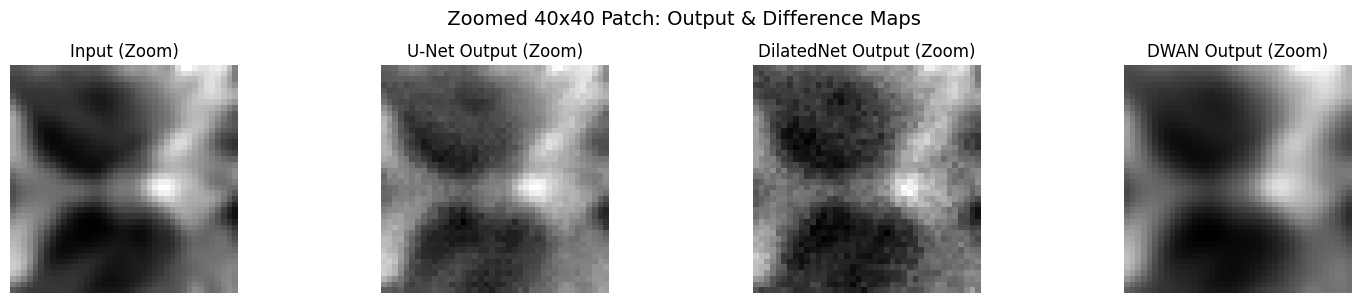

In [ ]:
# ------------------------------
#  Difference Visualization (Zoomed)
# ------------------------------

# Define zoom crop region (center 40x40 patch)
zoom_size = 40
center = 64
x1, x2 = center - zoom_size // 2, center + zoom_size // 2

input_crop = input_tensor.squeeze().numpy()[x1:x2, x1:x2]

plt.figure(figsize=(15, 8))

# Input Crop
plt.subplot(3, 4, 1)
plt.imshow(input_crop, cmap='gray')
plt.title("Input (Zoom)")
plt.axis('off')

# For each model: show output crop and difference map
for i, (name, out_tensor) in enumerate(outputs.items()):
    out_crop = out_tensor.squeeze().numpy()[x1:x2, x1:x2]
    diff_map = np.abs(input_crop - out_crop)

    # Output Crop
    plt.subplot(3, 4, i + 2)
    plt.imshow(out_crop, cmap='gray')
    plt.title(f"{name} Output (Zoom)")
    plt.axis('off')



plt.suptitle(" Zoomed 40x40 Patch: Output & Difference Maps", fontsize=14)
plt.tight_layout()
plt.show()


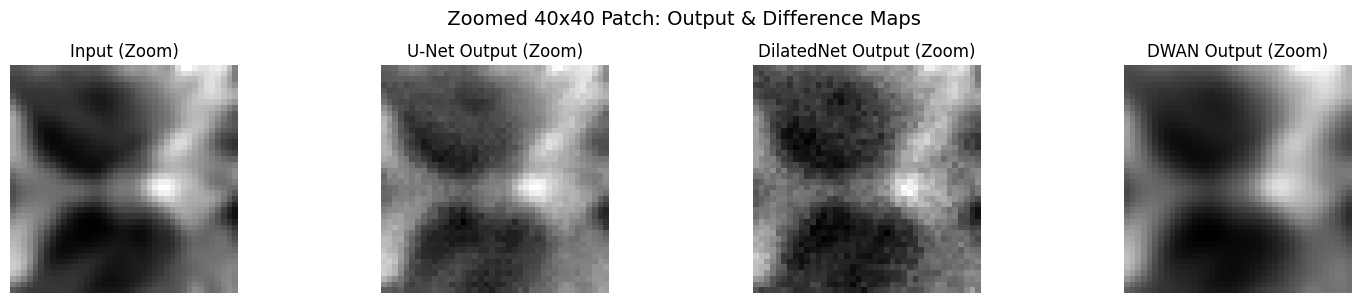

In [ ]:

# ------------------------------
#  Difference Visualization (Zoomed)
# ------------------------------

# Define zoom crop region (center 40x40 patch)
zoom_size = 40
center = 64
x1, x2 = center - zoom_size // 2, center + zoom_size // 2

input_crop = input_tensor.squeeze().numpy()[x1:x2, x1:x2]

plt.figure(figsize=(15, 8))

# Input Crop
plt.subplot(3, 4, 1)
plt.imshow(input_crop, cmap='gray')
plt.title("Input (Zoom)")
plt.axis('off')


# For each model: show output crop and difference map
for i, (name, out_tensor) in enumerate(outputs.items()):
    out_crop = out_tensor.squeeze().numpy()[x1:x2, x1:x2]
    diff_map = np.abs(input_crop - out_crop)

    # Output Crop
    plt.subplot(3, 4, i + 2)
    plt.imshow(out_crop, cmap='gray')
    plt.title(f"{name} Output (Zoom)")
    plt.axis('off')



plt.suptitle(" Zoomed 40x40 Patch: Output & Difference Maps", fontsize=14)
plt.tight_layout()
plt.show()


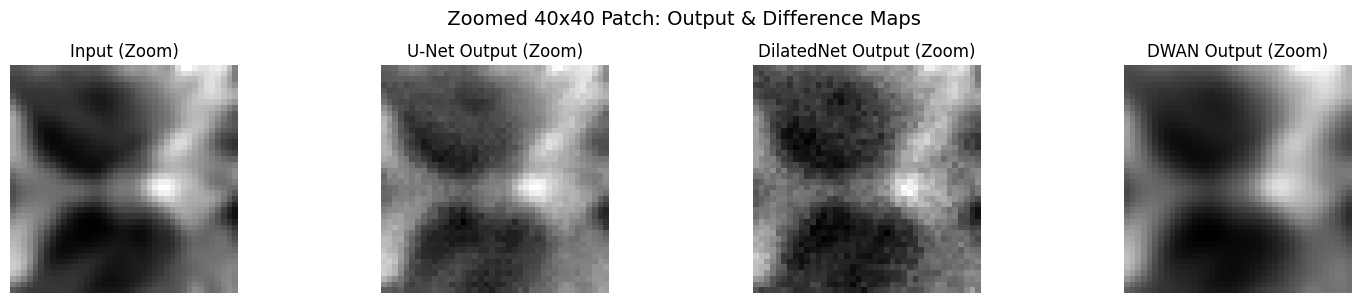

In [ ]:

# ------------------------------
#  Difference Visualization (Zoomed)
# ------------------------------

# Define zoom crop region (center 40x40 patch)
zoom_size = 40
center = 64
x1, x2 = center - zoom_size // 2, center + zoom_size // 2

input_crop = input_tensor.squeeze().numpy()[x1:x2, x1:x2]

plt.figure(figsize=(15, 8))

# Input Crop
plt.subplot(3, 4, 1)
plt.imshow(input_crop, cmap='gray')
plt.title("Input (Zoom)")
plt.axis('off')

# For each model: show output crop and difference map
for i, (name, out_tensor) in enumerate(outputs.items()):
    out_crop = out_tensor.squeeze().numpy()[x1:x2, x1:x2]
    diff_map = np.abs(input_crop - out_crop)

    # Output Crop
    plt.subplot(3, 4, i + 2)
    plt.imshow(out_crop, cmap='gray')
    plt.title(f"{name} Output (Zoom)")
    plt.axis('off')



plt.suptitle(" Zoomed 40x40 Patch: Output & Difference Maps", fontsize=14)
plt.tight_layout()
plt.show()
